# Welcome!

We'll look at a couple examples of using the datasets we've been collecting in-house while working on Waggle. To make this easier, I've included a dataset module which aggregates all the different sensors into a wide, combined Pandas DataFrame.

In [30]:
%matplotlib inline
import pandas as pd
import dataset

# A First Example

We'll start by loading a weeks worth of data from one particular node.

In [33]:
df = dataset.load_from_urls([
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-01.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-02.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-03.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-04.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-05.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-06.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-07.csv.gz',
])

We'll see what's available by looking at the first few entries.

In [35]:
df.head()

,APDS-9006-020.intensity,BMI160.acceleration.x,BMI160.acceleration.y,BMI160.acceleration.z,BMI160.index,BMI160.orientation.x,BMI160.orientation.y,BMI160.orientation.z,BMP180.pressure,BMP180.temperature,...,SHT25.temperature,SO2/H2S Temp.adc_temperature,SPV1840LR5H-B.intensity,Si1145.intensity,TMP112.temperature,TMP421.temperature,TSL250RD-AS.intensity,TSL250RD-LS.intensity,TSL260RD.intensity,TSYS01.temperature
2017-10-01 00:00:16,97.0,-81.0,979.0,106.0,0.0,0.0,10.0,-11.0,83458.0,16.40,...,1794.0,1853.0,818.0,27956.0,16.71,25.56,574.0,22261.0,21137.0,16.89
2017-10-01 00:00:40,99.0,-77.0,978.0,98.0,0.0,0.0,11.0,-11.0,83452.0,16.30,...,1782.0,1853.0,819.0,27956.0,16.62,25.43,591.0,22260.0,21136.0,16.77
2017-10-01 00:01:04,102.0,-94.0,978.0,63.0,0.0,0.0,8.0,-11.0,83456.0,16.20,...,1771.0,1853.0,819.0,27956.0,16.53,25.31,606.0,22259.0,21135.0,16.66
2017-10-01 00:01:28,106.0,-140.0,979.0,84.0,0.0,0.0,10.0,-11.0,83457.0,16.14,...,1760.0,1826.0,819.0,27956.0,16.44,25.13,619.0,22258.0,21135.0,16.61
2017-10-01 00:01:52,109.0,-104.0,978.0,70.0,0.0,0.0,10.0,-11.0,83454.0,16.11,...,1753.0,1826.0,819.0,27956.0,16.43,25.06,633.0,22258.0,21133.0,16.57


Now we'll plot a few of the raw sensor results in the dataset.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1158f3748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116049d68>], dtype=object)

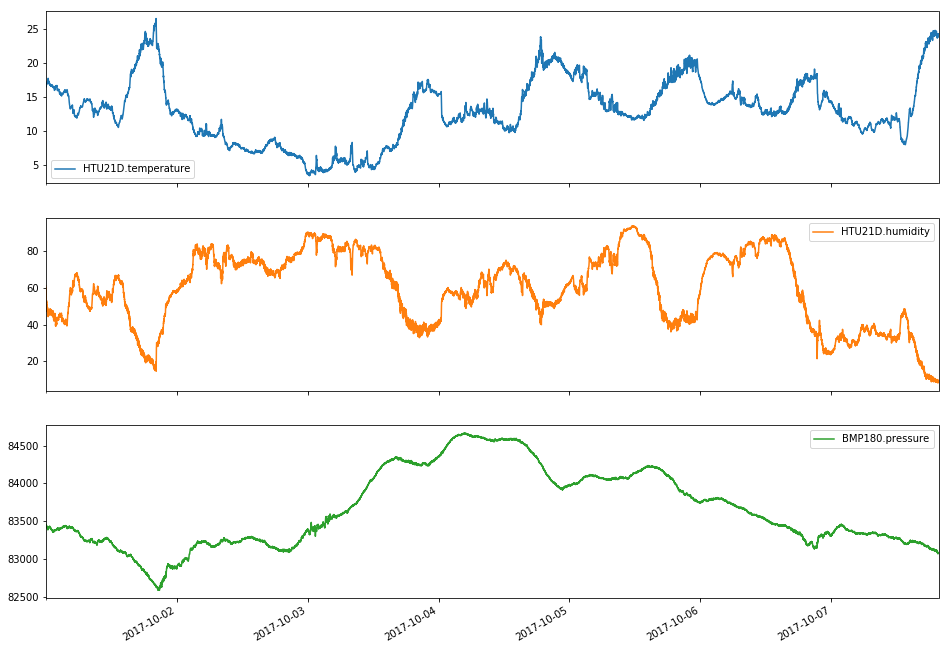

In [37]:
columns = [
    'HTU21D.temperature',
    'HTU21D.humidity',
    'BMP180.pressure',
]

df[columns].plot(figsize=(16, 12), subplots=True, sharex=True)

This looks a little rough, so we'll resample and take the mean of every 15 minute interval.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1185daef0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116a2cef0>], dtype=object)

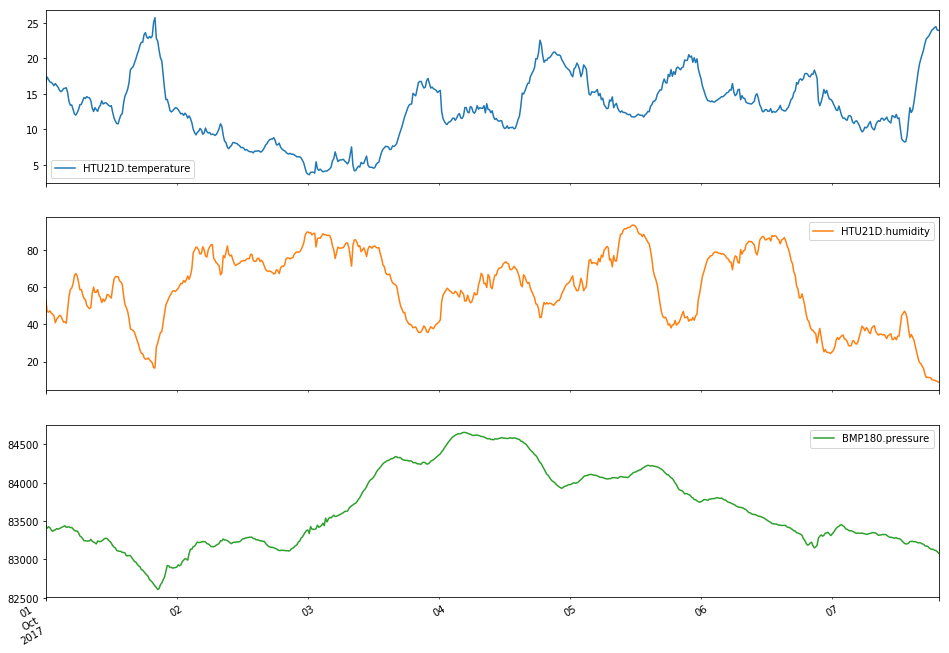

In [38]:
df[columns].resample('15Min').mean().plot(figsize=(16, 12), subplots=True, sharex=True)

# A Second Example

We'll look at data from one more node which we've had testing on and off. In cases like this, you tend to have missing windows of data so resampling can improve the presentation of timeseries visualization.

In [ ]:
df = dataset.load_from_urls([
    'http://beehive1.mcs.anl.gov/datasets/2/001e061088a6/2017-09-26.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e061088a6/2017-09-27.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e061088a6/2017-09-28.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e061088a6/2017-10-05.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e061088a6/2017-10-06.csv.gz',
])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11401ca90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1155621d0>], dtype=object)

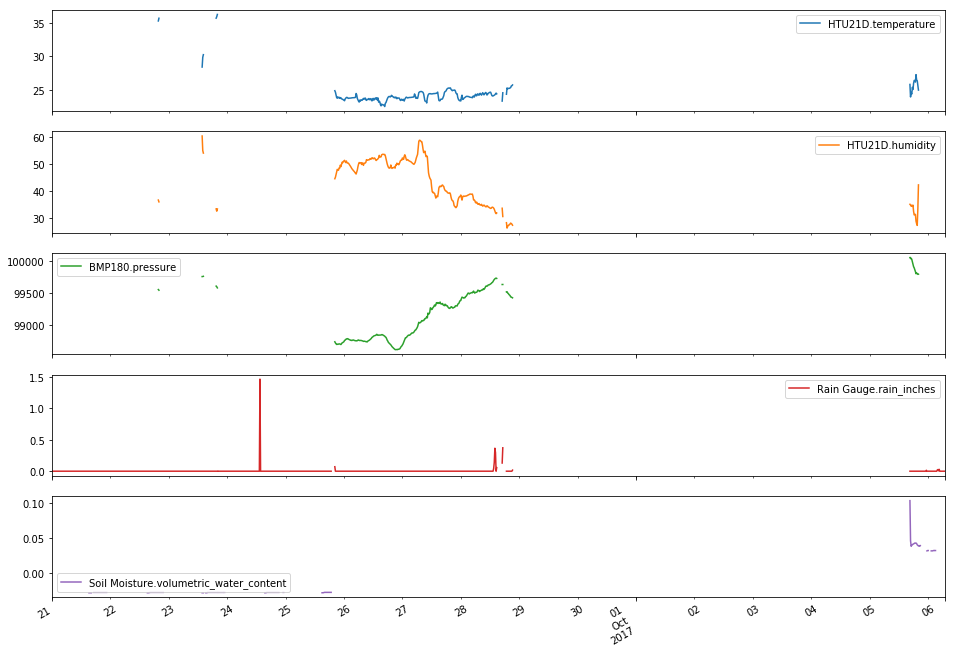

In [44]:
columns = [
    'HTU21D.temperature',
    'HTU21D.humidity',
    'BMP180.pressure',
    'Rain Gauge.rain_inches',
    'Soil Moisture.volumetric_water_content',
]

df[columns].resample('15Min').mean().plot(figsize=(16, 12), subplots=True, sharex=True)